In [5]:
import math
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import urllib
import zipfile
%matplotlib inline
df = pd.read_csv("TRU.csv")
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03
mean,56.905036,57.558736,56.268984,56.930164,56.548876,1.134668e+06
std,23.004044,23.259002,22.724439,22.974602,22.992891,1.183078e+06
min,21.080000,21.510000,20.430000,20.980000,20.753132,7.460000e+04
25%,32.867500,33.177499,32.639999,32.922500,32.566496,5.827750e+05
50%,58.114999,58.710001,57.029999,57.990000,57.362929,9.125000e+05
75%,75.574999,76.304999,74.828249,75.630003,75.076168,1.363925e+06
max,102.510002,102.800003,99.870003,100.970001,100.970001,2.592230e+07


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

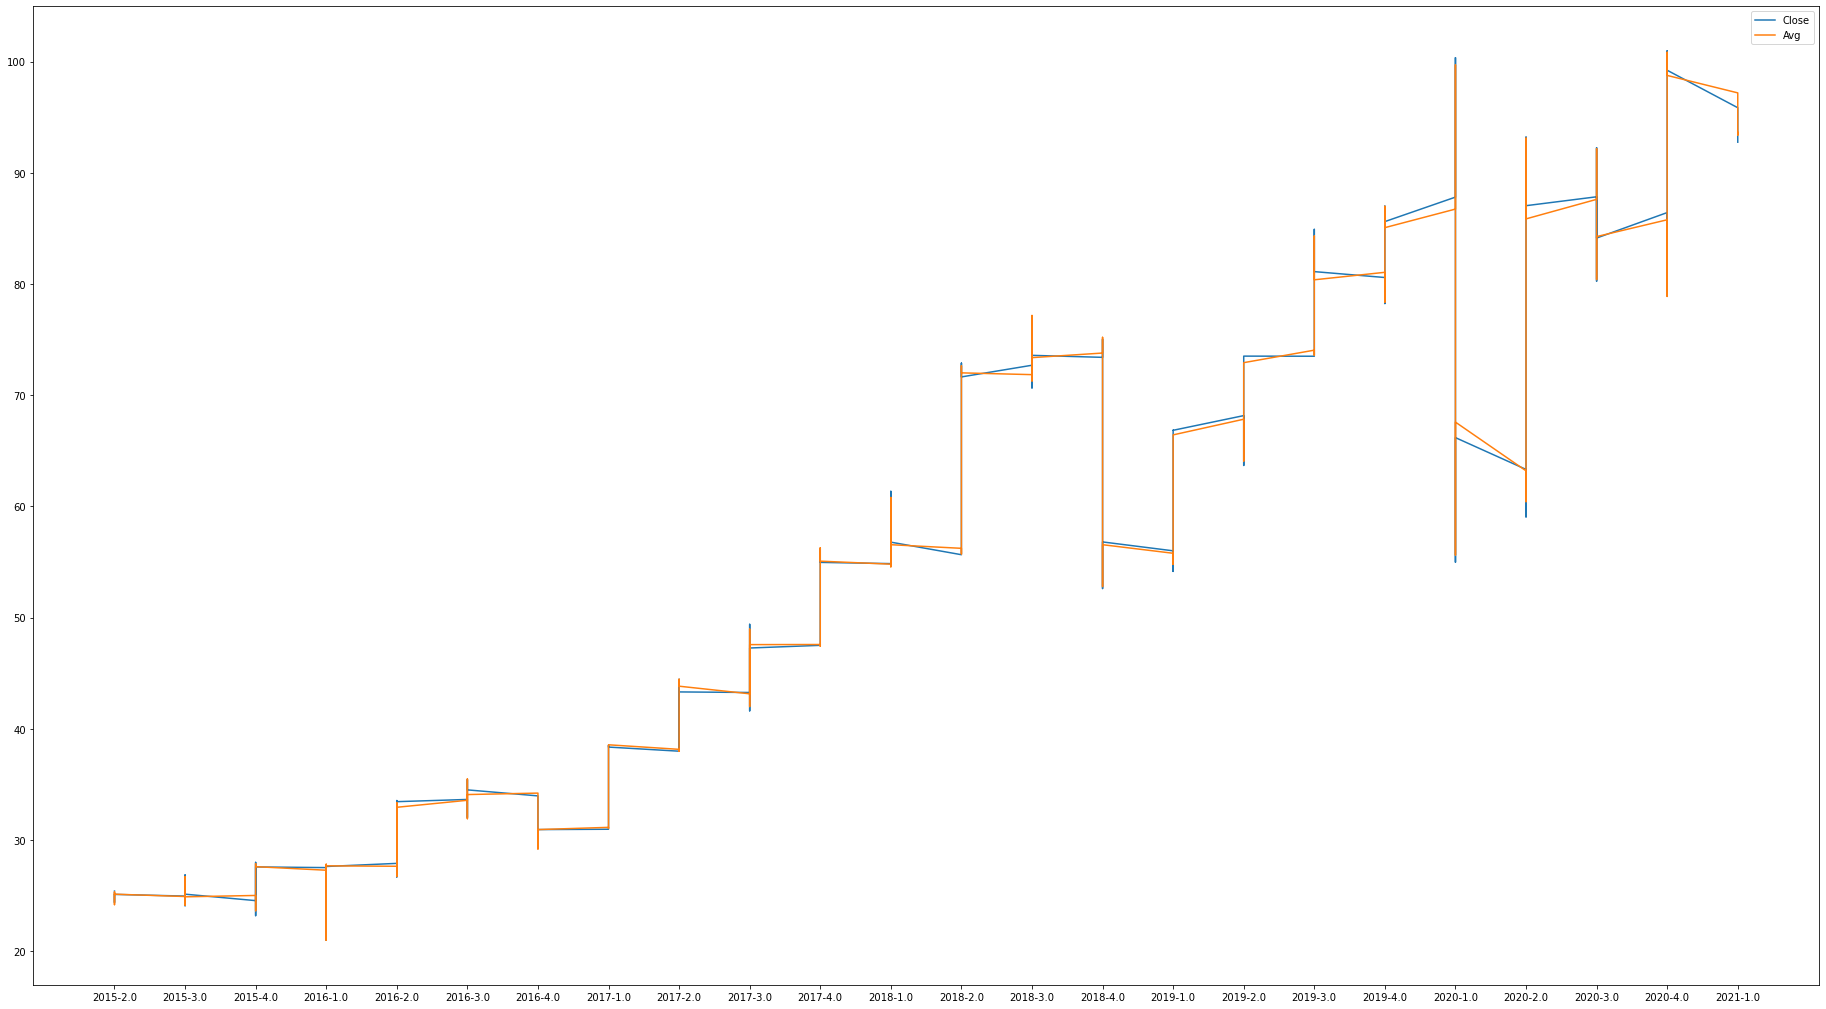

In [40]:
def smooth(window, array):
    return np.correlate(array, np.ones(window)/window, 'valid')


df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by='Date')
df['year'] = pd.DatetimeIndex(df.Date).year
df['month'] = pd.DatetimeIndex(df.Date).month
df['yearmonth'] = df.year.astype(str) + "-" + df.month.astype(str)
df['quarter'] = np.ceil(df.month/3)
df['yearquar'] = df.year.astype(str) + "-" + df.quarter.astype(str)
df['avg'] = (df.High+df.Low)/2

pp.figure(figsize=(32,18))
pp.plot(df.yearquar,df.Close,label='Close')
pp.plot(df.yearquar,df.avg,label='Avg')
pp.legend()

In [48]:

#pp.plot(df.year,smooth(10,df.High))

len(smooth(10,df.High))

1391